# Assessment Course Work

## Data Pre-Processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import time

import pandas as pd
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [3]:
data = pd.read_csv("Travel_by_Distance.csv")
data2 = pd.read_csv("Travel_Full_Data.csv")

## Cleaning Data

In [4]:
data = data.replace('',np.nan)
data = data.dropna(axis=0)
data = data.drop_duplicates()
print(data)

          Level       Date  State FIPS State Postal Code  County FIPS  \
21061    County   6/6/2021        56.0                WY      56045.0   
22762    County   6/6/2021         5.0                AR       5011.0   
22763    County   6/6/2021         5.0                AR       5013.0   
22764    County   6/6/2021         5.0                AR       5015.0   
22765    County   6/6/2021         5.0                AR       5017.0   
...         ...        ...         ...               ...          ...   
1048570  County  11/1/2019        19.0                IA      19185.0   
1048571  County  11/1/2019        19.0                IA      19187.0   
1048572  County  11/1/2019        19.0                IA      19189.0   
1048573  County  11/1/2019        19.0                IA      19191.0   
1048574  County  11/1/2019        19.0                IA      19193.0   

               County Name  Population Staying at Home  \
21061        Weston County                      1268.0   
22762  

## Data Catergorisation

In [5]:
df = dd.from_pandas(data)
df2 = dd.from_pandas(data2)

### Question 1A

In [6]:
df['Week'].nunique().compute()

45

In [35]:
ph = df.groupby(by = 'Week') ['Population Staying at Home']
pop_at_home = df.groupby(by = 'Week') ['Population Staying at Home'].mean()
pop_at_home.compute()
pop_at_home.sum().compute()

900810.9264714143

#### Histogram

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 25., 16.]),
 array([ 7465.21212121,  8918.54751175, 10371.88290228, 11825.21829281,
        13278.55368335, 14731.88907388, 16185.22446442, 17638.55985495,
        19091.89524548, 20545.23063602, 21998.56602655]),
 <BarContainer object of 10 artists>)

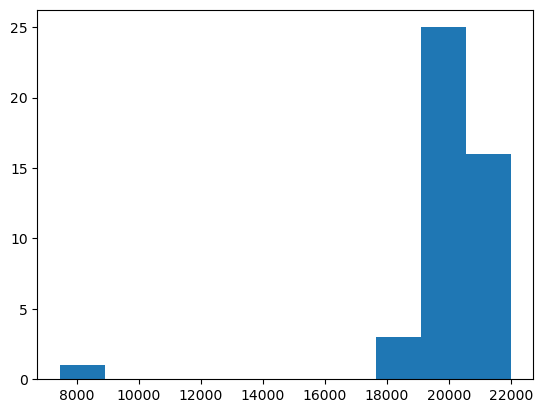

In [8]:
plt.hist(pop_at_home)

In [9]:
Tripss = df2['Trips 1-25 Miles'].compute()

(array([1., 0., 0., 1., 1., 1., 0., 2., 0., 1.]),
 array([9.34957837e+08, 9.49911886e+08, 9.64865935e+08, 9.79819983e+08,
        9.94774032e+08, 1.00972808e+09, 1.02468213e+09, 1.03963618e+09,
        1.05459023e+09, 1.06954428e+09, 1.08449832e+09]),
 <BarContainer object of 10 artists>)

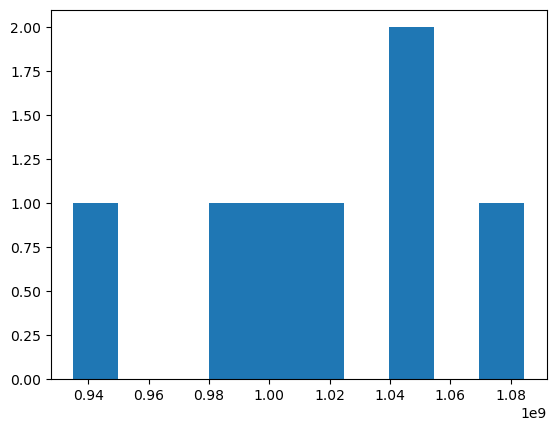

In [10]:
plt.hist(Tripss)

### Question 1B

In [11]:
Trips1025 = df[df['Number of Trips 10-25'] > 10000000]
Trips1025['Date']

Trips50100 = df[df['Number of Trips 50-100'] > 10000000]
Trips50100['Date']

Dask Series Structure:
npartitions=1
21061      string
1048574       ...
Dask Name: getitem, 5 expressions
Expr=(Filter(frame=df, predicate=df['Number of Trips 50-100'] > 10000000))['Date']

c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(


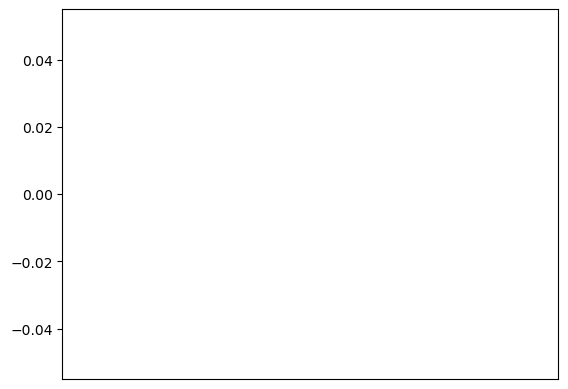

In [12]:
plt.scatter(Trips1025,Trips1025['Date'])

c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(
c:\Users\reeti\anaconda3\Lib\site-packages\dask\dataframe\core.py:3769: UserWarning: Dask currently has limited support for converting pandas extension dtypes to arrays. Converting string to object dtype.
  warnings.warn(


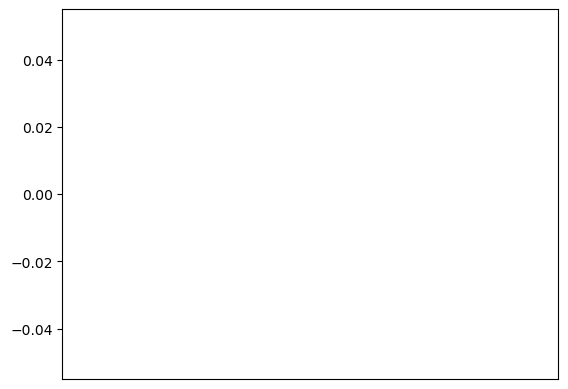

In [13]:
plt.scatter(Trips50100,Trips50100['Date'])

### Question 1C

#### Pandas

#### Dask

In [14]:
n_processors = [10,20]
n_processors_time = {}

for processor in n_processors:
    start_time = time.time()
    #Code from Question 1A
    pop_at_home = df.groupby(by = 'Week') ['Population Staying at Home'].mean()
    pop_at_home.compute()
    pop_at_home.sum().compute()
    dask_time = time.time() - start_time
    n_processors_time[processor] = dask_time

print(n_processors_time)


{10: 1.2462725639343262, 20: 1.3359055519104004}


### Question 1D

In [15]:
y = df[(df['Week']=='32')]['Number of Trips 10-25']
x = df2['Trips 10-25 Miles']
x2 = df.iloc[:,13]
y2 = df2.iloc[:,12]
y2 = np.array(x2).reshape((-1,1))
model = LinearRegression()
model.fit(y2,x2)

model.score(y2,x2)

1.0

### Question 1E

(array([2., 1., 2., 0., 0., 0., 1., 0., 0., 1.]),
 array([2.58404133e+08, 2.59773861e+08, 2.61143590e+08, 2.62513318e+08,
        2.63883047e+08, 2.65252775e+08, 2.66622503e+08, 2.67992232e+08,
        2.69361960e+08, 2.70731689e+08, 2.72101417e+08]),
 <BarContainer object of 10 artists>)

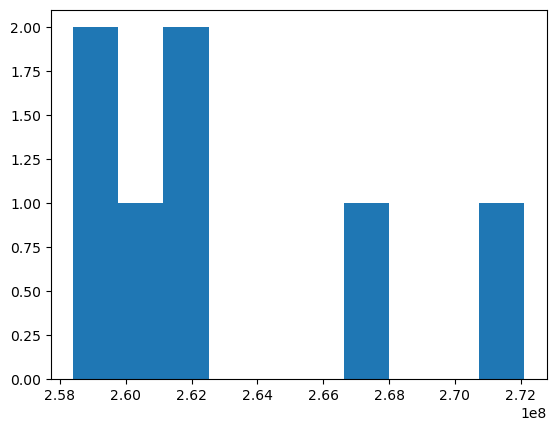

In [16]:
x1 = df2['People Not Staying at Home']
plt.hist(x1, label='Graph')


([<matplotlib.patches.Wedge at 0x1679ca0ec00>,
 [Text(0.9948601797272288, 0.46931143475639503, '08/04'),
  Text(0.2635837413112693, 1.067953000518447, '08/05'),
  Text(-0.664783882701883, 0.8763916871466829, '08/06'),
  Text(-1.0992638004808621, 0.04023800383184299, '08/07'),
  Text(-0.7238149653036678, -0.8283066437029528, '08/08'),
  Text(0.21161483810269024, -1.0794531765179871, '08/09'),
  Text(0.987344991455729, -0.4849225379865187, '08/10')])

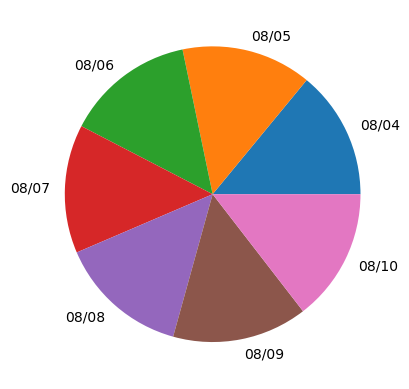

In [17]:
plt.pie(df2['People Not Staying at Home'], labels=('08/04','08/05','08/06','08/07','08/08','08/09','08/10'))

In [ ]:
sizes = df2[['Trips 1-3 Miles','Trips 10-25 Miles','Trips 100-250 Miles','Trips 100+ Miles','Trips 25-100 Miles','Trips 25-50 Miles','Trips 250-500 Miles','Trips 3-5 Miles','Trips 5-10 Miles','Trips 50-100 Miles','Trips 500+ Miles']]
print(sizes)

Dask DataFrame Structure:
              Trips 1-3 Miles Trips 10-25 Miles Trips 100-250 Miles Trips 100+ Miles Trips 25-100 Miles Trips 25-50 Miles Trips 250-500 Miles Trips 3-5 Miles Trips 5-10 Miles Trips 50-100 Miles Trips 500+ Miles
npartitions=1                                                                                                                                                                                                     
0                       int64             int64               int64            int64              int64             int64               int64           int64            int64              int64            int64
6                         ...               ...                 ...              ...                ...               ...                 ...             ...              ...                ...              ...
Dask Name: getitem, 2 expressions
Expr=df[['Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles', 'Trips 100+ Miles', 'Tri